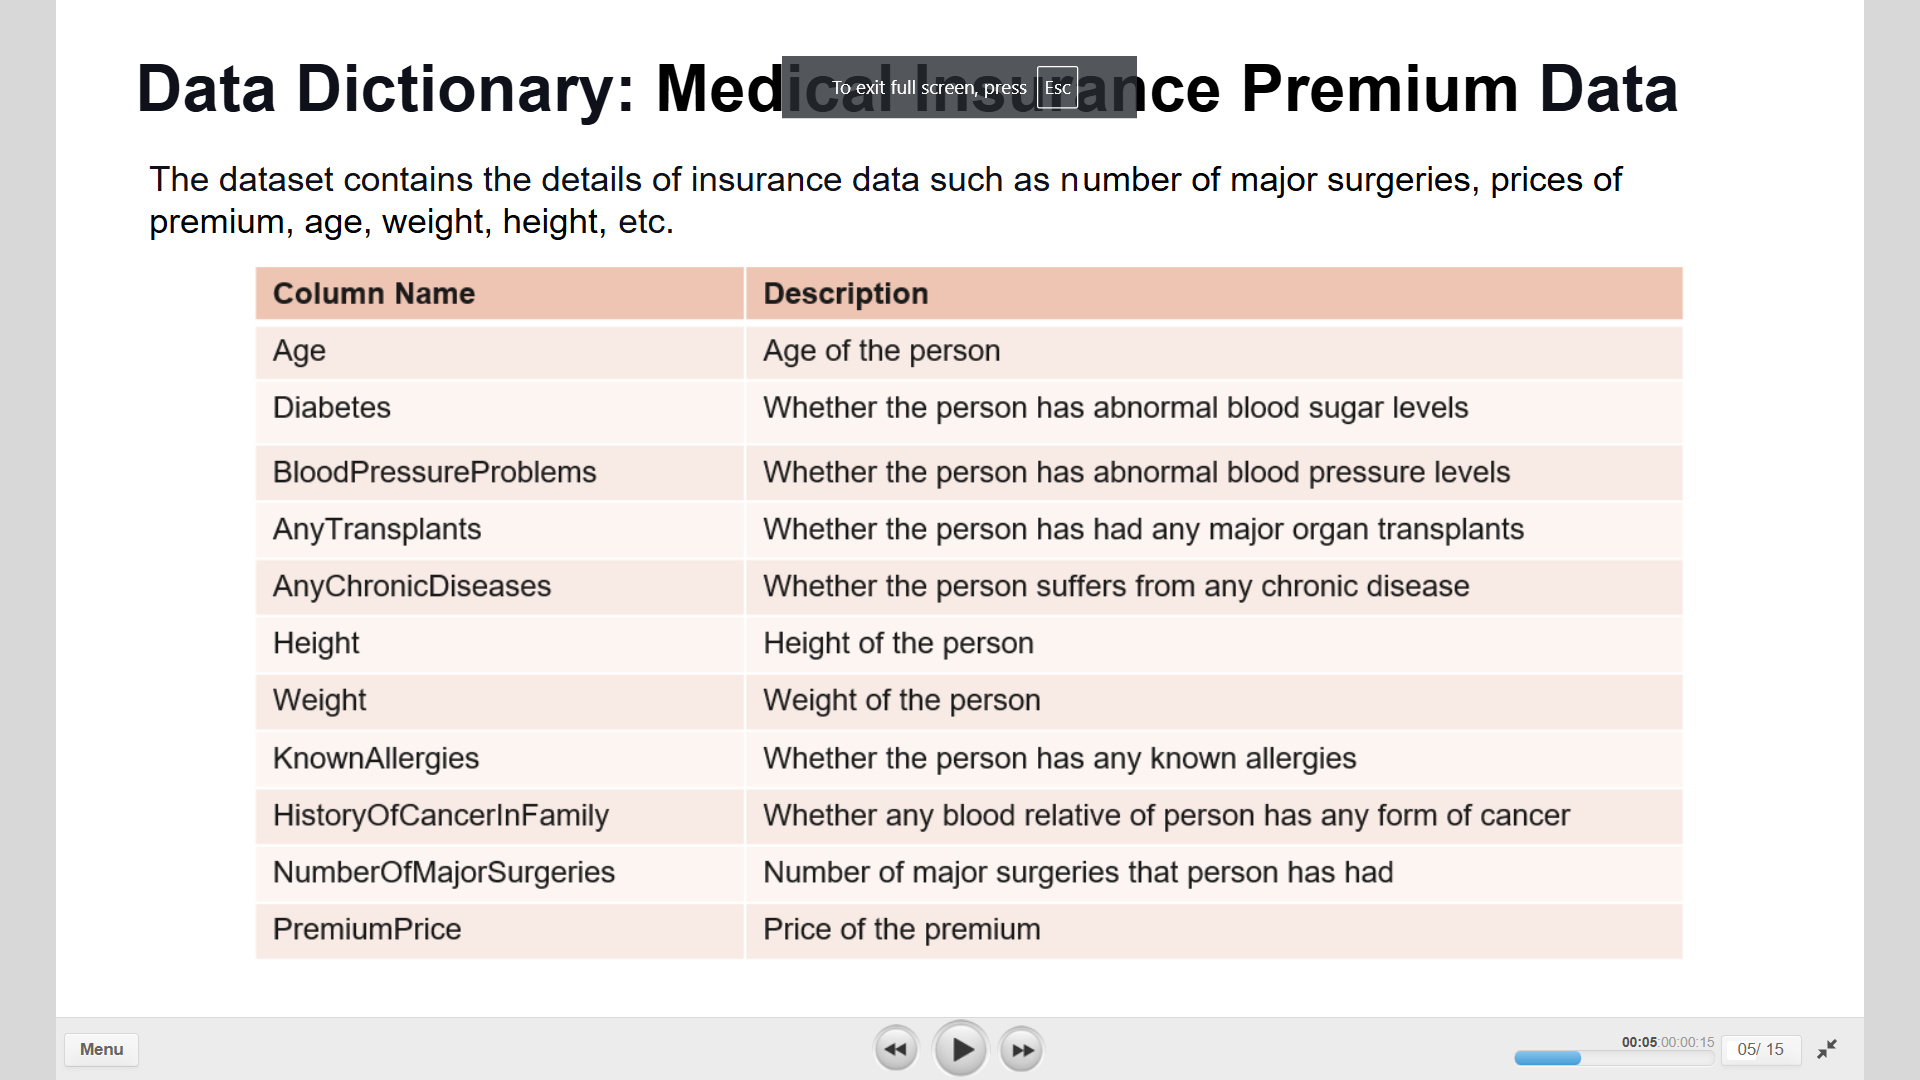# 

# 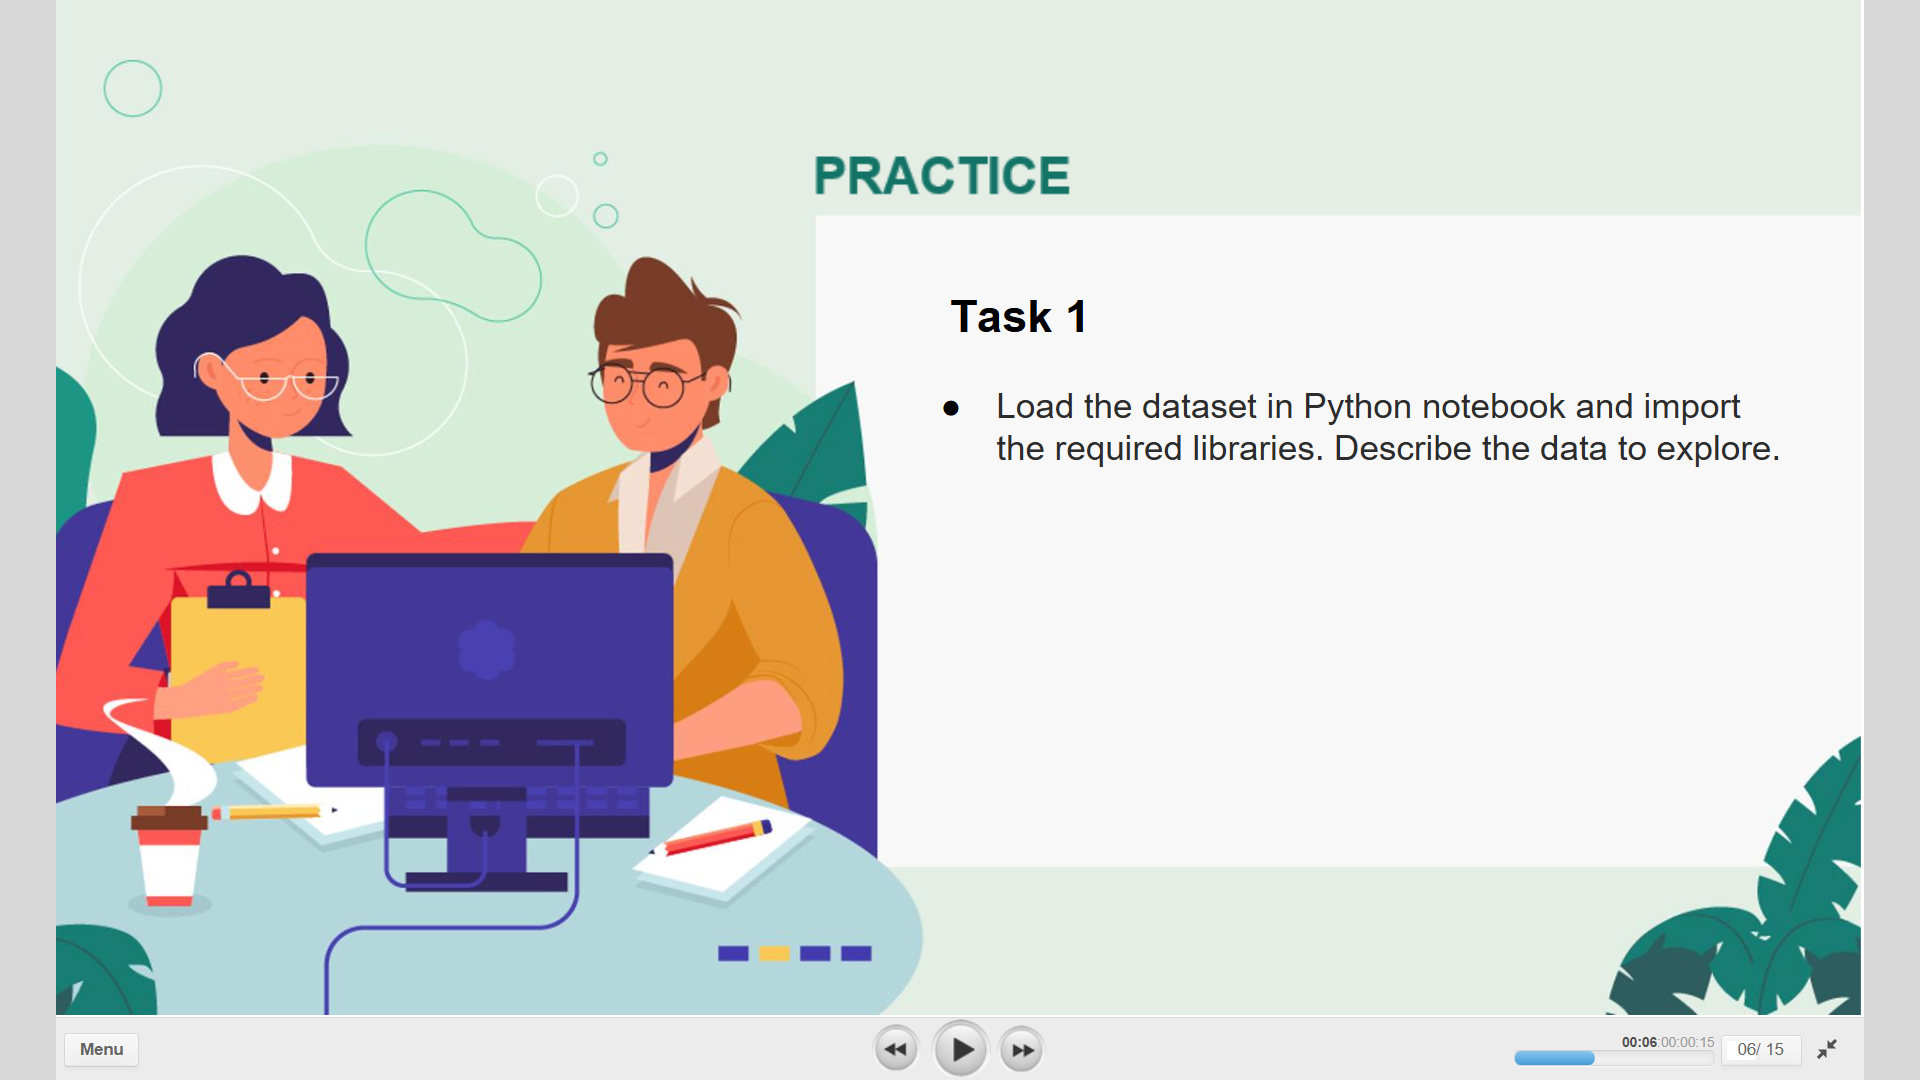

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
medical_df=pd.read_csv('DS1_C9_S3_Practice_MedicalPremium_Data.csv')
medical_df.head(2)

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000

In [6]:
medical_df.shape# it has 986 rows and 11 columns

(986, 11)

In [7]:
medical_df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [9]:
medical_df.isnull().sum()# no missing values

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [10]:
medical_df.describe()

Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  986.000000  986.000000             986.000000      986.000000   
mean    41.745436    0.419878               0.468560        0.055781   
std     13.963371    0.493789               0.499264        0.229615   
min     18.000000    0.000000               0.000000        0.000000   
25%     30.000000    0.000000               0.000000        0.000000   
50%     42.000000    0.000000               0.000000        0.000000   
75%     53.000000    1.000000               1.000000        0.000000   
max     66.000000    1.000000               1.000000        1.000000   

       AnyChronicDiseases      Height      Weight  KnownAllergies  \
count          986.000000  986.000000  986.000000      986.000000   
mean             0.180527  168.182556   76.950304        0.215010   
std              0.384821   10.098155   14.265096        0.411038   
min              0.000000  145.000000   51.000000        0.000000   
25%              0.000000  161.000000   67.000000        0.000000   
50%              0.000000  168.000000   75.000000        0.000000   
75%              0.000000  176.000000   87.000000        0.000000   
max              1.000000  188.000000  132.000000        1.000000   

       HistoryOfCancerInFamily  NumberOfMajorSurgeries  PremiumPrice  
count               986.000000              986.000000    986.000000  
mean                  0.117647                0.667343  24336.713996  
std                   0.322353                0.749205   6248.184382  
min                   0.000000                0.000000  15000.000000  
25%                   0.000000                0.000000  21000.000000  
50%                   0.000000                1.000000  23000.000000  
75%                   0.000000                1.000000  28000.000000  
max                   1.000000                3.000000  40000.000000

# 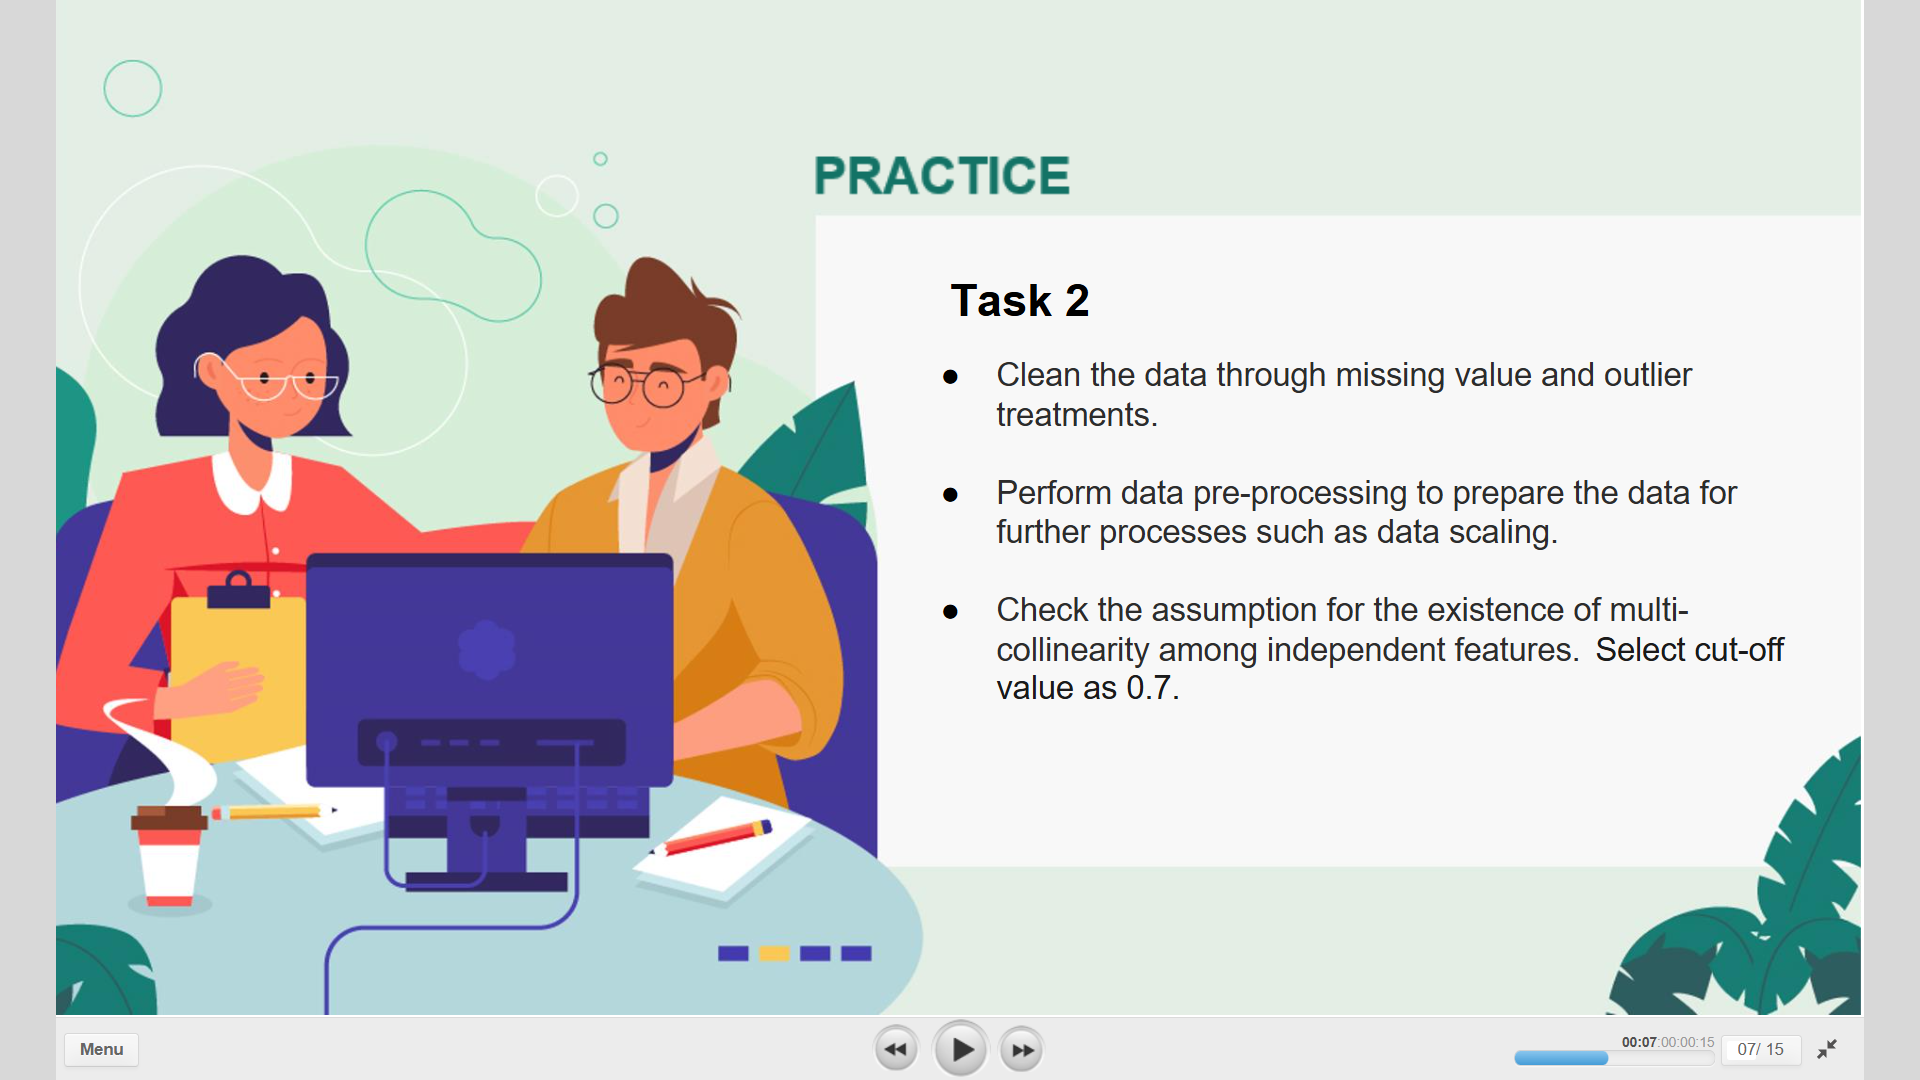

In [12]:
medical_df.isnull().sum()# there is no missing values

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

<Axes: >

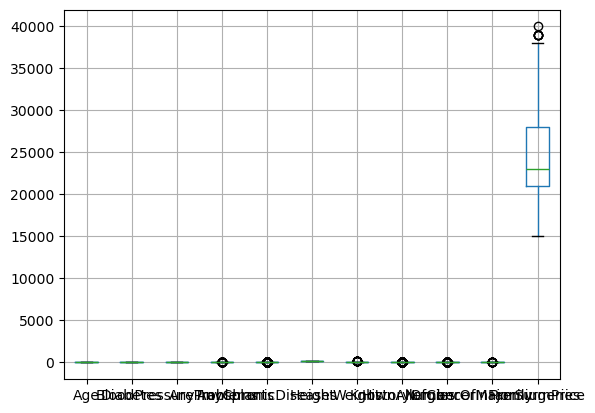

In [13]:
medical_df.boxplot()

In [14]:
for x in medical_df.columns:
    q1=medical_df[x].quantile(0.25)
    q3=medical_df[x].quantile(0.75)
    iqr=q3-q1
    uf=q3+1.5*iqr
    lf=q1-1.5*iqr
    p=medical_df[x].mean()
    medical_df.loc[(medical_df[x]>uf)|(medical_df[x]<lf),x]=p

In [46]:
# b) data scaling
cols=medical_df.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(medical_df)
df_scaled=pd.DataFrame(df_scaled,columns=cols)
medical_df.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0  45.0       0.0                    0.0             0.0            0.000000   
1  60.0       1.0                    0.0             0.0            0.000000   
2  36.0       1.0                    1.0             0.0            0.000000   
3  52.0       1.0                    1.0             0.0            0.180527   
4  38.0       0.0                    0.0             0.0            0.180527   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0   155.0    57.0             0.0                      0.0   
1   180.0    73.0             0.0                      0.0   
2   158.0    59.0             0.0                      0.0   
3   183.0    93.0             0.0                      0.0   
4   166.0    88.0             0.0                      0.0   

   NumberOfMajorSurgeries  PremiumPrice  
0                     0.0       25000.0  
1                     0.0       29000.0  
2                     1.0       23000.0  
3                     2.0       28000.0  
4                     1.0       23000.0

In [48]:
abs(df_scaled.corr())>=0.7# as per q

Age  Diabetes  BloodPressureProblems  \
Age                       True     False                  False   
Diabetes                 False      True                  False   
BloodPressureProblems    False     False                   True   
AnyTransplants           False     False                  False   
AnyChronicDiseases       False     False                  False   
Height                   False     False                  False   
Weight                   False     False                  False   
KnownAllergies           False     False                  False   
HistoryOfCancerInFamily  False     False                  False   
NumberOfMajorSurgeries   False     False                  False   
PremiumPrice              True     False                  False   

                         AnyTransplants  AnyChronicDiseases  Height  Weight  \
Age                               False               False   False   False   
Diabetes                          False               False   False   False   
BloodPressureProblems             False               False   False   False   
AnyTransplants                     True               False   False   False   
AnyChronicDiseases                False                True   False   False   
Height                            False               False    True   False   
Weight                            False               False   False    True   
KnownAllergies                    False               False   False   False   
HistoryOfCancerInFamily           False               False   False   False   
NumberOfMajorSurgeries            False               False   False   False   
PremiumPrice                      False               False   False   False   

                         KnownAllergies  HistoryOfCancerInFamily  \
Age                               False                    False   
Diabetes                          False                    False   
BloodPressureProblems             False                    False   
AnyTransplants                    False                    False   
AnyChronicDiseases                False                    False   
Height                            False                    False   
Weight                            False                    False   
KnownAllergies                     True                    False   
HistoryOfCancerInFamily           False                     True   
NumberOfMajorSurgeries            False                    False   
PremiumPrice                      False                    False   

                         NumberOfMajorSurgeries  PremiumPrice  
Age                                       False          True  
Diabetes                                  False         False  
BloodPressureProblems                     False         False  
AnyTransplants                            False         False  
AnyChronicDiseases                        False         False  
Height                                    False         False  
Weight                                    False         False  
KnownAllergies                            False         False  
HistoryOfCancerInFamily                   False         False  
NumberOfMajorSurgeries                     True         False  
PremiumPrice                              False          True

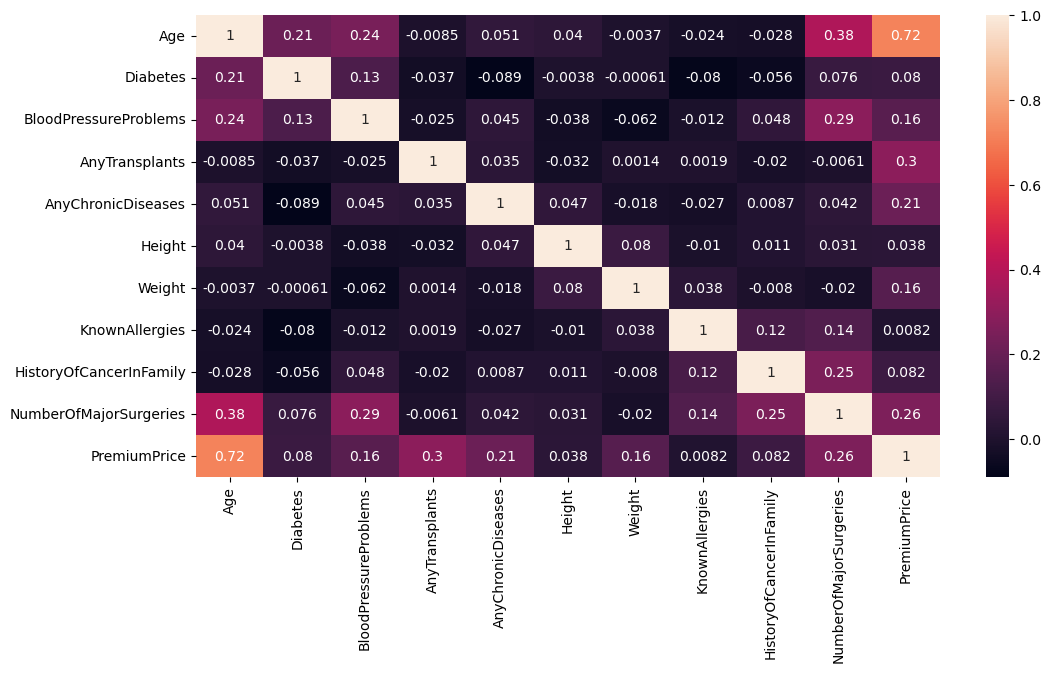

In [58]:
plt.gcf().set_size_inches(12,6)
sns.heatmap(df_scaled.corr(),annot=True)
plt.show()

# Age and PremiumPrice have >0.7 corrlation

# 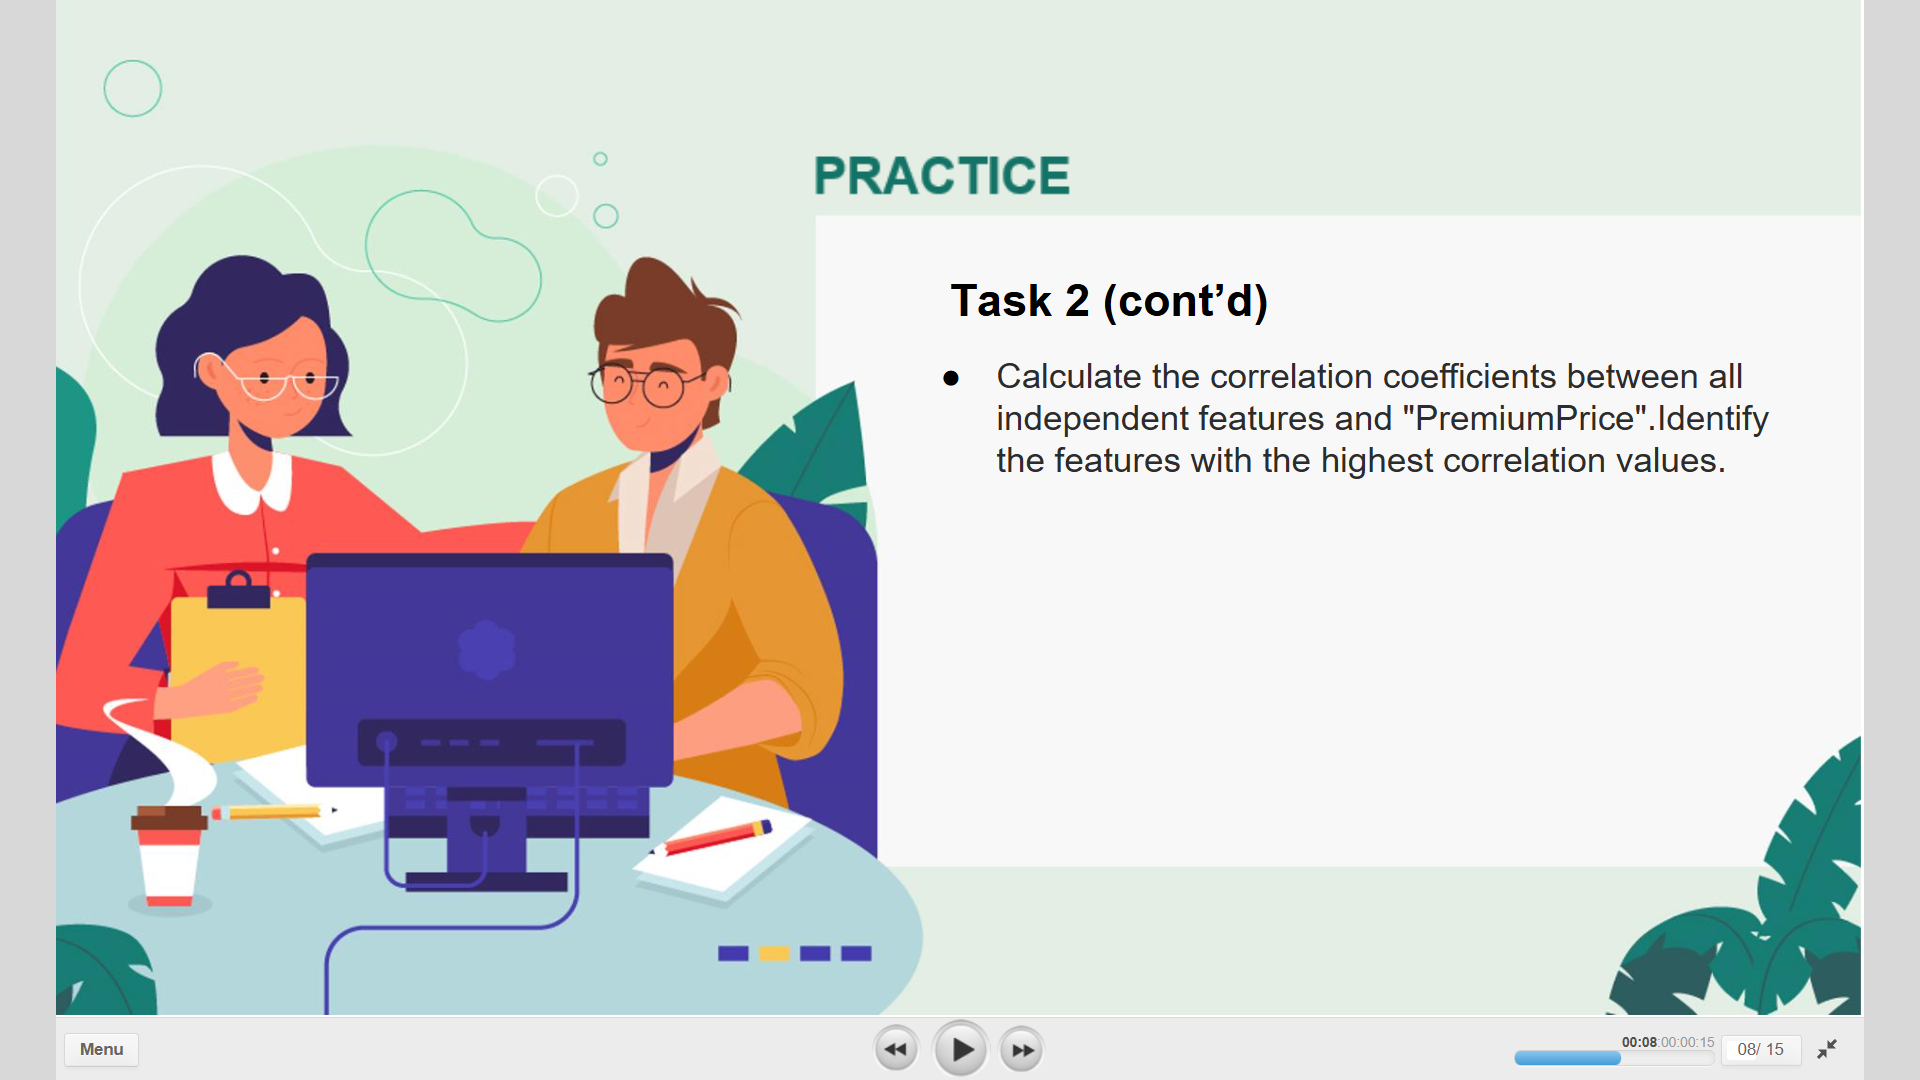

In [62]:
sorted_corr=df_scaled.corr()[['PremiumPrice']].sort_values(by='PremiumPrice',ascending=False)

In [64]:
sorted_corr

PremiumPrice
PremiumPrice                 1.000000
Age                          0.718064
AnyTransplants               0.297757
NumberOfMajorSurgeries       0.255860
AnyChronicDiseases           0.212481
BloodPressureProblems        0.159254
Weight                       0.155339
HistoryOfCancerInFamily      0.082462
Diabetes                     0.079916
Height                       0.038060
KnownAllergies               0.008216

# Age and PremiumPrice have highest corrlation value 0.71.
# followed by the following columns AnyTransplants,NumberOfMajorSurgeries,AnyChronicDiseases

# 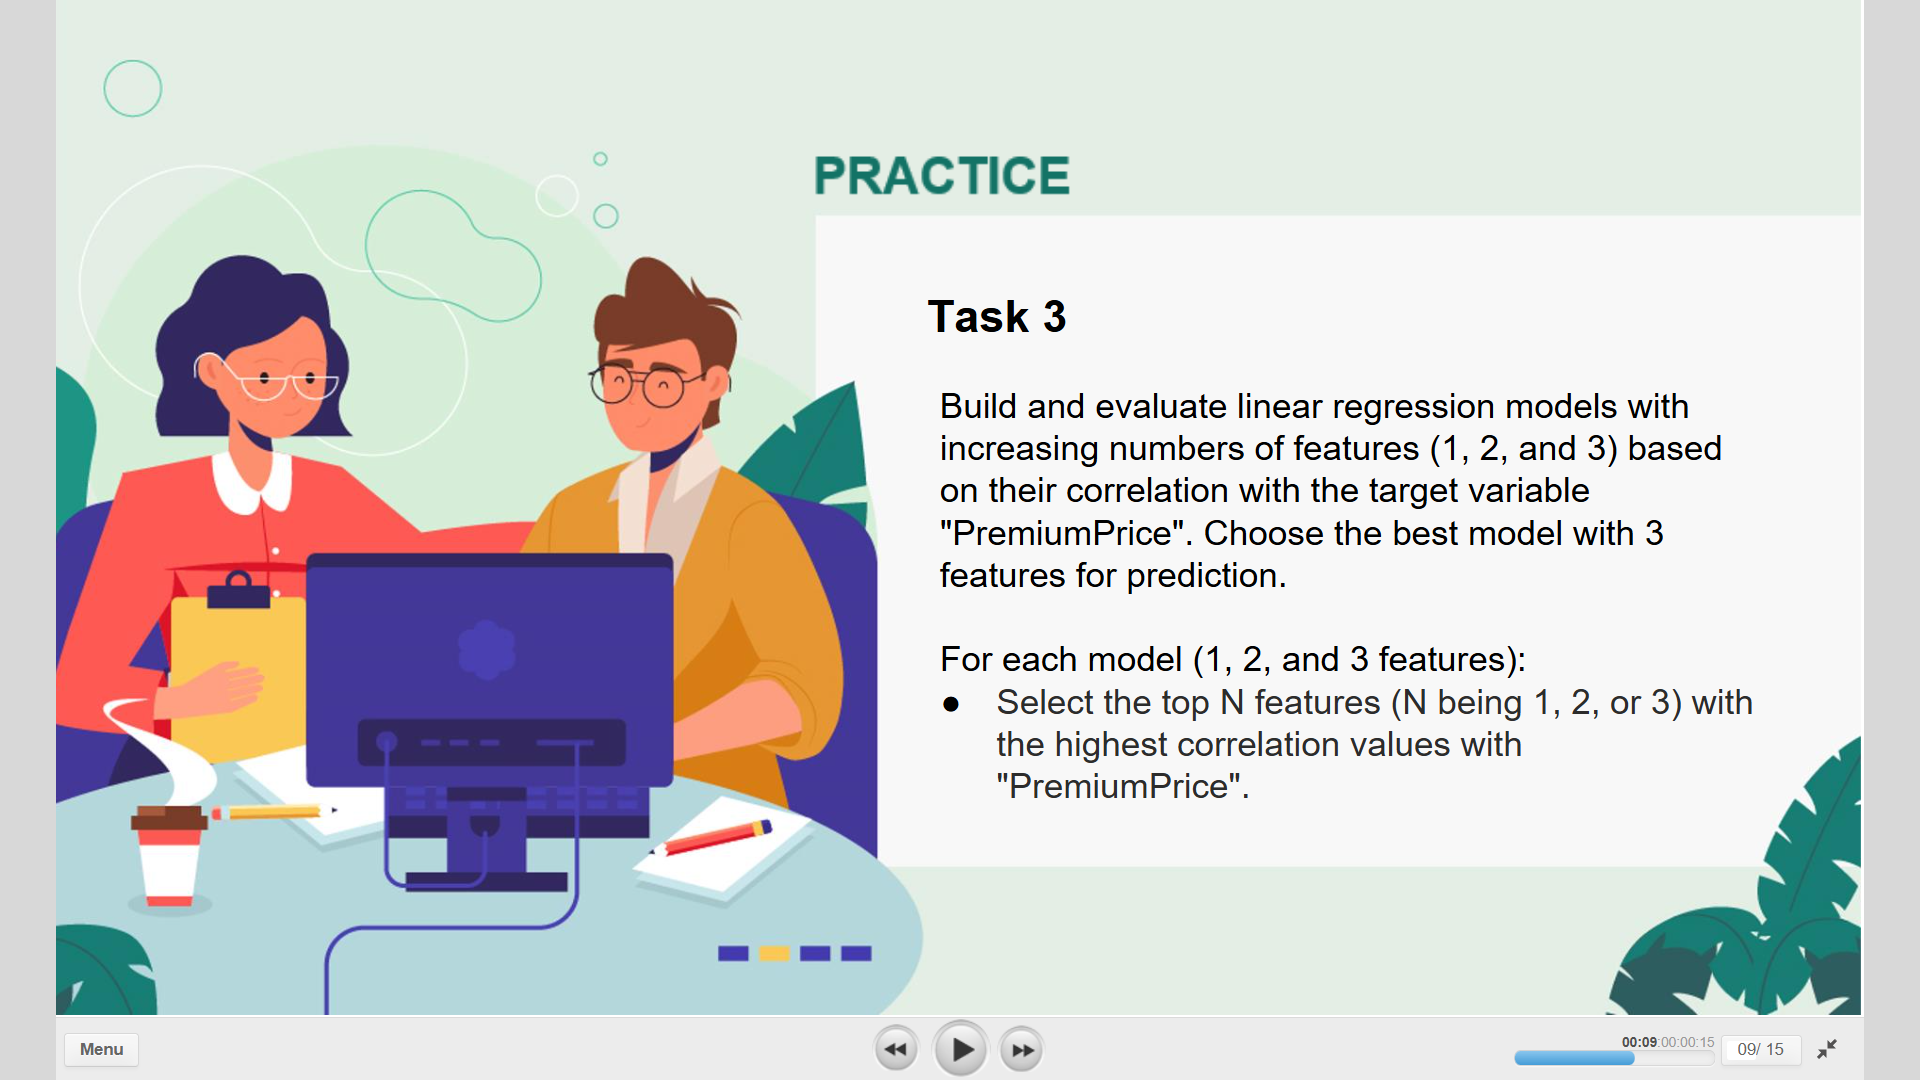

# 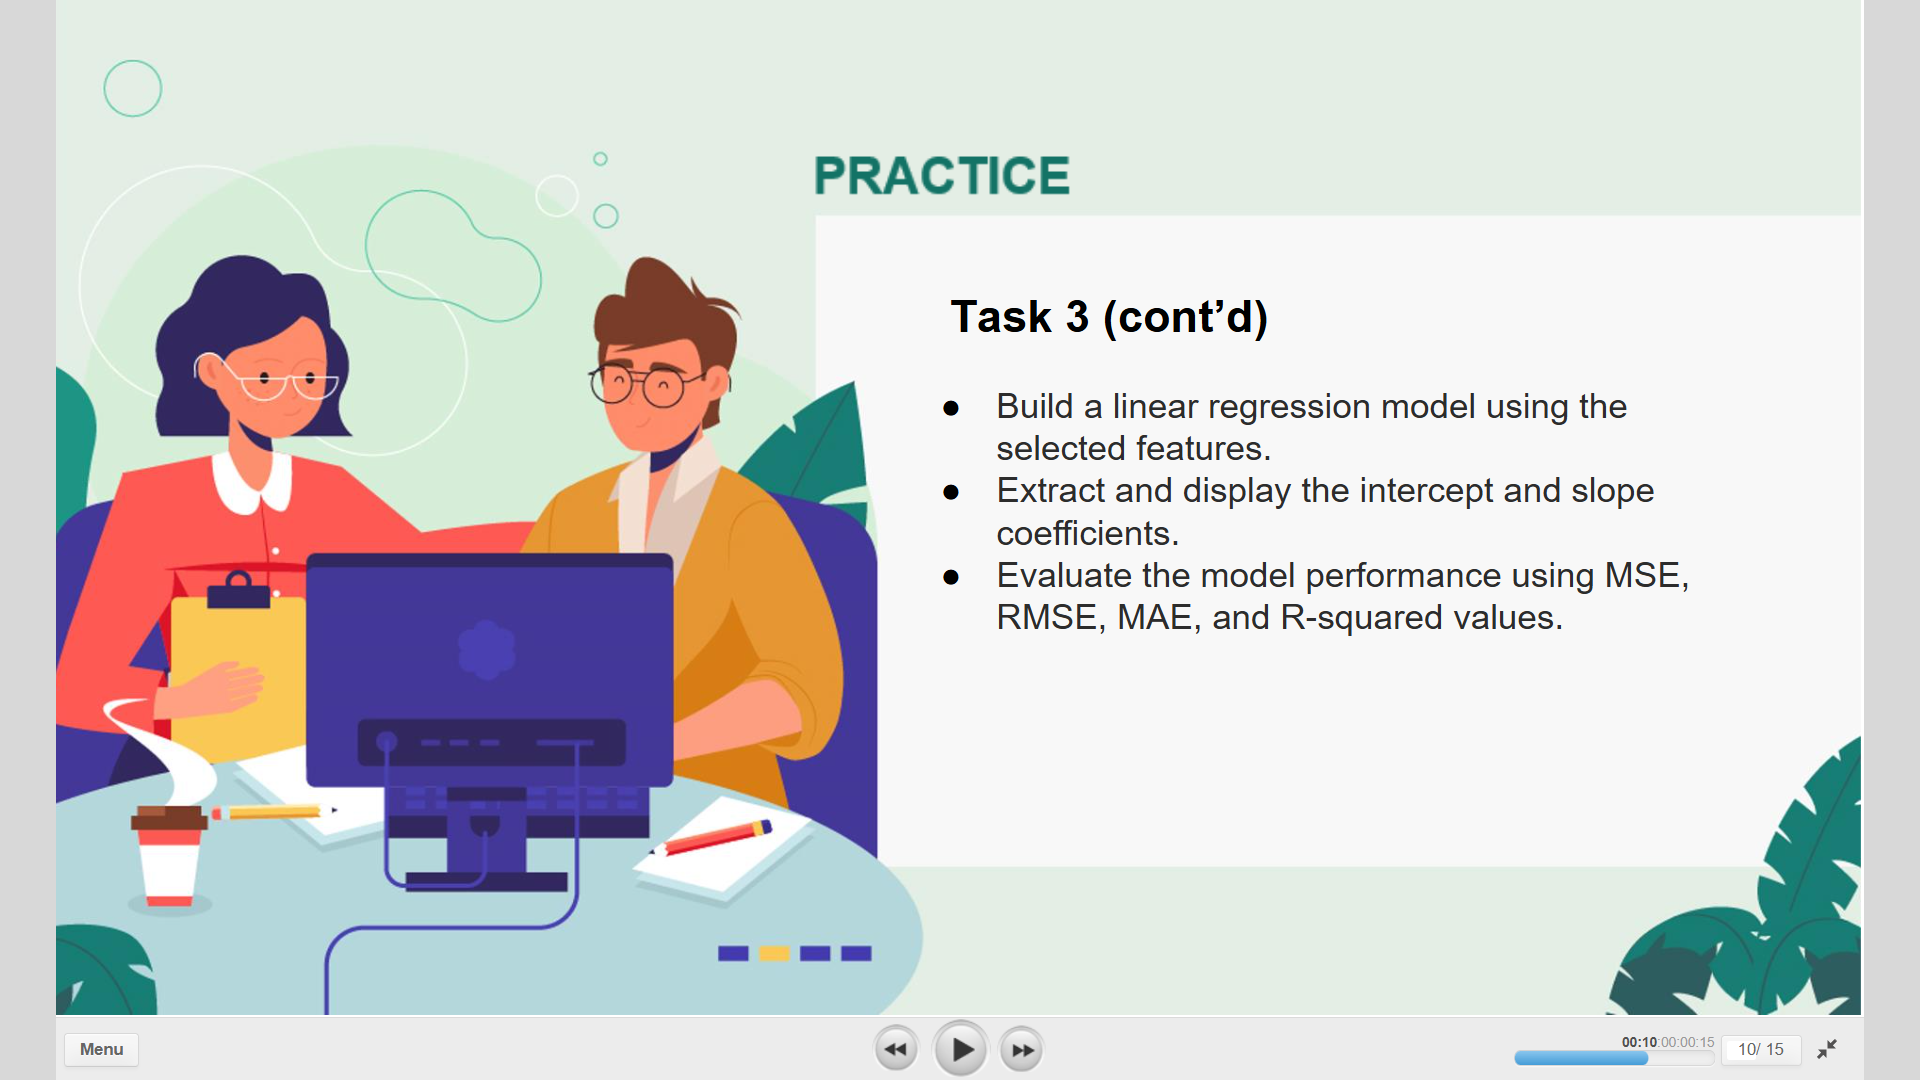

# 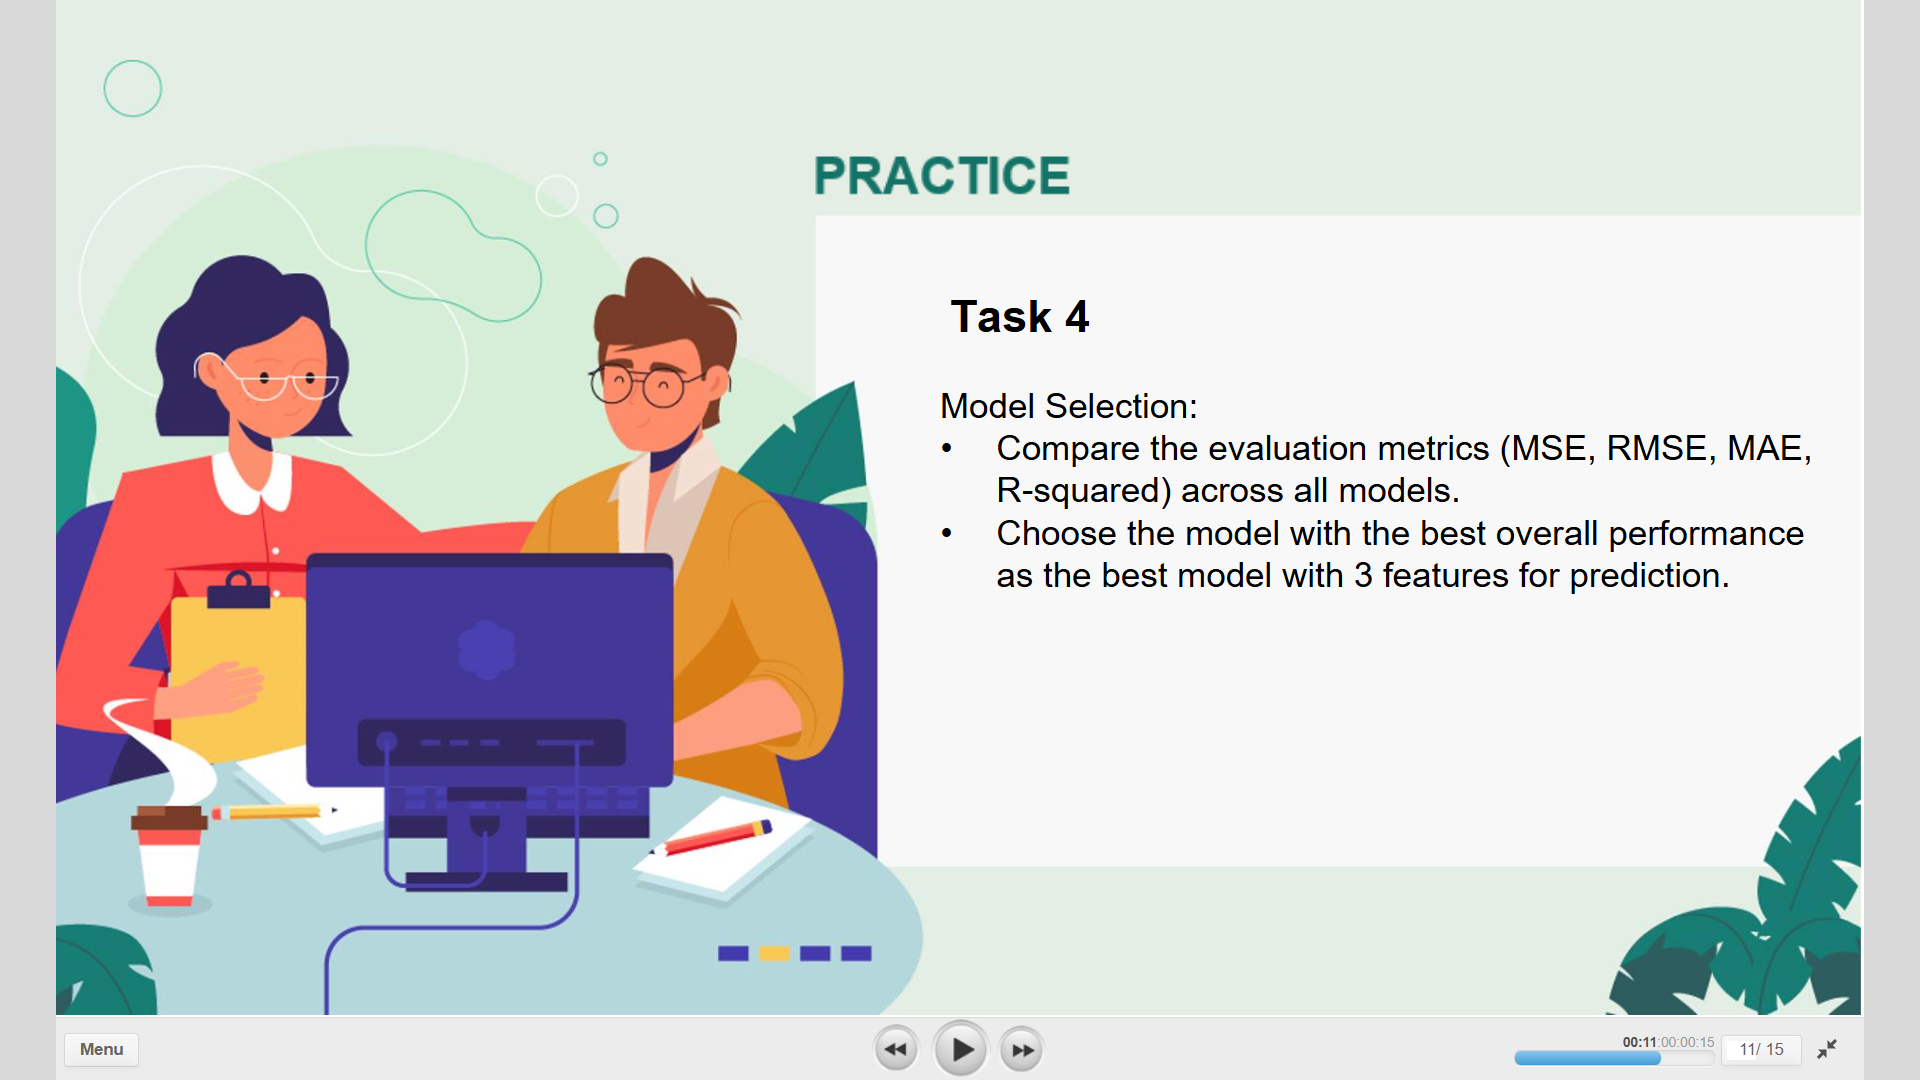

In [83]:
#first model
print('.....................1st model(Age).....................')
X1=np.array(df_scaled['Age']).reshape((-1,1))
y=np.array(df_scaled['PremiumPrice'])

# splitting the dataset
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,test_size=0.3,random_state=200)
s_model1=LinearRegression().fit(X_train1,y_train1)

#score of trained model
s_model_score=s_model1.score(X_train1,y_train1)
print('score of trained model',s_model_score)

# displaying intercept and slope
print('intercept',s_model1.intercept_)
print('Slope',s_model1.coef_)

#predicting on test data
y_pred1=s_model1.predict(X_test1)
#print(y_pred1)

# calculating mse ,mae,rmse,r-squared value of the model to acces performance on test data
mse1=round(mean_squared_error(y_test1,y_pred1),2)
print('mean squared error',mse1)
mae=round(mean_absolute_error(y_test1,y_pred1),2)
print('mean absolute error',mae)
rmse1=round(mean_squared_error(y_test1,y_pred1,squared=False),2)
print('root mean squared error',rmse1)
r2_1=round(r2_score(y_test1,y_pred1),2)
print('r2(square) score :',r2_1)

.....................1st model(Age).....................
score of trained model 0.5156142790580635
intercept 0.007892153520428154
Slope [0.7361793]
mean squared error 0.43
mean absolute error 0.48
root mean squared error 0.66
r2(square) score : 0.51


# AnyTransplants(WITH FEATURE)

In [85]:
# second model
print('.....................2nd model(Age,AnyTransplants).....................')

X2=np.array(df_scaled[['Age','AnyTransplants']]).reshape((-1,2))
y=np.array(df_scaled['PremiumPrice'])

# splitting the dataset
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,test_size=0.3,random_state=200)
s_model2=LinearRegression().fit(X_train2,y_train2)

#score of trained model
s_model_score2=s_model2.score(X_train2,y_train2)
print('score of trained model',s_model_score2)

# displaying intercept and slope
print('intercept',s_model2.intercept_)
print('Slope',s_model2.coef_)

#predicting on test data
y_pred2=s_model2.predict(X_test2)
#print(y_pred2)

# calculating mse ,mae,rmse,r-squared value of the model to acces performance on test data
mse2=round(mean_squared_error(y_test2,y_pred2),2)
print('mean squared error',mse2)
mae2=round(mean_absolute_error(y_test2,y_pred2),2)
print('mean absolute error',mae2)
rmse2=round(mean_squared_error(y_test2,y_pred2,squared=False),2)
print('root mean squared error',rmse2)
r2_2=round(r2_score(y_test2,y_pred2),2)
print('r2(square) score :',r2_2)

.....................2nd model(Age,AnyTransplants).....................
score of trained model 0.6157475204473157
intercept -0.0009589640335532605
Slope [0.74119706 0.30750364]
mean squared error 0.37
mean absolute error 0.46
root mean squared error 0.61
r2(square) score : 0.58


# AnyTransplants,NumberOfMajorSurgeries(WITH FEATURE)

In [87]:
#THIRD model
print('.....................3rd model(Age,AnyTransplants,NumberOfMajorSurgeries.....................')
X3=np.array(df_scaled[['Age','AnyTransplants','NumberOfMajorSurgeries']]).reshape((-1,3))
y=np.array(df_scaled['PremiumPrice'])

# splitting the dataset
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y,test_size=0.3,random_state=200)
s_model3=LinearRegression().fit(X_train3,y_train3)

#score of trained model
s_model_score3=s_model3.score(X_train3,y_train3)
print('score of trained model',s_model_score3)

# displaying intercept and slope
print('intercept',s_model3.intercept_)
print('Slope',s_model3.coef_)

#predicting on test data
y_pred3=s_model3.predict(X_test3)
#print(y_pred3)

# calculating mse ,mae,rmse,r-squared value of the model to acces performance on test data
mse3=round(mean_squared_error(y_test3,y_pred3),2)
print('mean squared error',mse3)
mae3=round(mean_absolute_error(y_test3,y_pred3),2)
print('mean absolute error',mae3)
rmse3=round(mean_squared_error(y_test3,y_pred3,squared=False),2)
print('root mean squared error',rmse3)
r2_3=round(r2_score(y_test3,y_pred3),2)
print('r2(square) score :',r2_3)

.....................3rd model(Age,AnyTransplants,NumberOfMajorSurgeries.....................
score of trained model 0.616520153724819
intercept -0.0012442419828776544
Slope [ 0.75314579  0.30682397 -0.03107053]
mean squared error 0.37
mean absolute error 0.46
root mean squared error 0.61
r2(square) score : 0.58


In [ ]:
# evaluating


In [89]:
#first model
print('.....................1st model(Age).....................')
X1=np.array(df_scaled['Age']).reshape((-1,1))
y=np.array(df_scaled['PremiumPrice'])

# splitting the dataset
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,test_size=0.3,random_state=200)
s_model1=LinearRegression().fit(X_train1,y_train1)

#score of trained model
s_model_score=s_model1.score(X_train1,y_train1)
print('score of trained model',s_model_score)

# displaying intercept and slope
print('intercept',s_model1.intercept_)
print('Slope',s_model1.coef_)

#predicting on test data
y_pred1=s_model1.predict(X_test1)
#print(y_pred1)

# calculating mse ,mae,rmse,r-squared value of the model to acces performance on test data
mse1=round(mean_squared_error(y_test1,y_pred1),2)
print('mean squared error',mse1)
mae=round(mean_absolute_error(y_test1,y_pred1),2)
print('mean absolute error',mae)
rmse1=round(mean_squared_error(y_test1,y_pred1,squared=False),2)
print('root mean squared error',rmse1)
r2_1=round(r2_score(y_test1,y_pred1),2)
print('r2(square) score :',r2_1)


# second model
print('.....................2nd model(Age,AnyTransplants).....................')

X2=np.array(df_scaled[['Age','AnyTransplants']]).reshape((-1,2))
y=np.array(df_scaled['PremiumPrice'])

# splitting the dataset
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,test_size=0.3,random_state=200)
s_model2=LinearRegression().fit(X_train2,y_train2)

#score of trained model
s_model_score2=s_model2.score(X_train2,y_train2)
print('score of trained model',s_model_score2)

# displaying intercept and slope
print('intercept',s_model2.intercept_)
print('Slope',s_model2.coef_)

#predicting on test data
y_pred2=s_model2.predict(X_test2)
#print(y_pred2)

# calculating mse ,mae,rmse,r-squared value of the model to acces performance on test data
mse2=round(mean_squared_error(y_test2,y_pred2),2)
print('mean squared error',mse2)
mae2=round(mean_absolute_error(y_test2,y_pred2),2)
print('mean absolute error',mae2)
rmse2=round(mean_squared_error(y_test2,y_pred2,squared=False),2)
print('root mean squared error',rmse2)
r2_2=round(r2_score(y_test2,y_pred2),2)
print('r2(square) score :',r2_2)

#THIRD model
print('.....................3rd model(Age,AnyTransplants,NumberOfMajorSurgeries.....................')
X3=np.array(df_scaled[['Age','AnyTransplants','NumberOfMajorSurgeries']]).reshape((-1,3))
y=np.array(df_scaled['PremiumPrice'])

# splitting the dataset
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y,test_size=0.3,random_state=200)
s_model3=LinearRegression().fit(X_train3,y_train3)

#score of trained model
s_model_score3=s_model3.score(X_train3,y_train3)
print('score of trained model',s_model_score3)

# displaying intercept and slope
print('intercept',s_model3.intercept_)
print('Slope',s_model3.coef_)

#predicting on test data
y_pred3=s_model3.predict(X_test3)
#print(y_pred3)

# calculating mse ,mae,rmse,r-squared value of the model to acces performance on test data
mse3=round(mean_squared_error(y_test3,y_pred3),2)
print('mean squared error',mse3)
mae3=round(mean_absolute_error(y_test3,y_pred3),2)
print('mean absolute error',mae3)
rmse3=round(mean_squared_error(y_test3,y_pred3,squared=False),2)
print('root mean squared error',rmse3)
r2_3=round(r2_score(y_test3,y_pred3),2)
print('r2(square) score :',r2_3)

.....................1st model(Age).....................
score of trained model 0.5156142790580635
intercept 0.007892153520428154
Slope [0.7361793]
mean squared error 0.43
mean absolute error 0.48
root mean squared error 0.66
r2(square) score : 0.51
.....................2nd model(Age,AnyTransplants).....................
score of trained model 0.6157475204473157
intercept -0.0009589640335532605
Slope [0.74119706 0.30750364]
mean squared error 0.37
mean absolute error 0.46
root mean squared error 0.61
r2(square) score : 0.58
.....................3rd model(Age,AnyTransplants,NumberOfMajorSurgeries.....................
score of trained model 0.616520153724819
intercept -0.0012442419828776544
Slope [ 0.75314579  0.30682397 -0.03107053]
mean squared error 0.37
mean absolute error 0.46
root mean squared error 0.61
r2(square) score : 0.58


# 1st model has less r square compared to 2nd and 3 rd model.All the error mean squaree,mean absolute ,rmse are also lesser for 2nd and 3rd model we chose 3rd model for better representative 

# 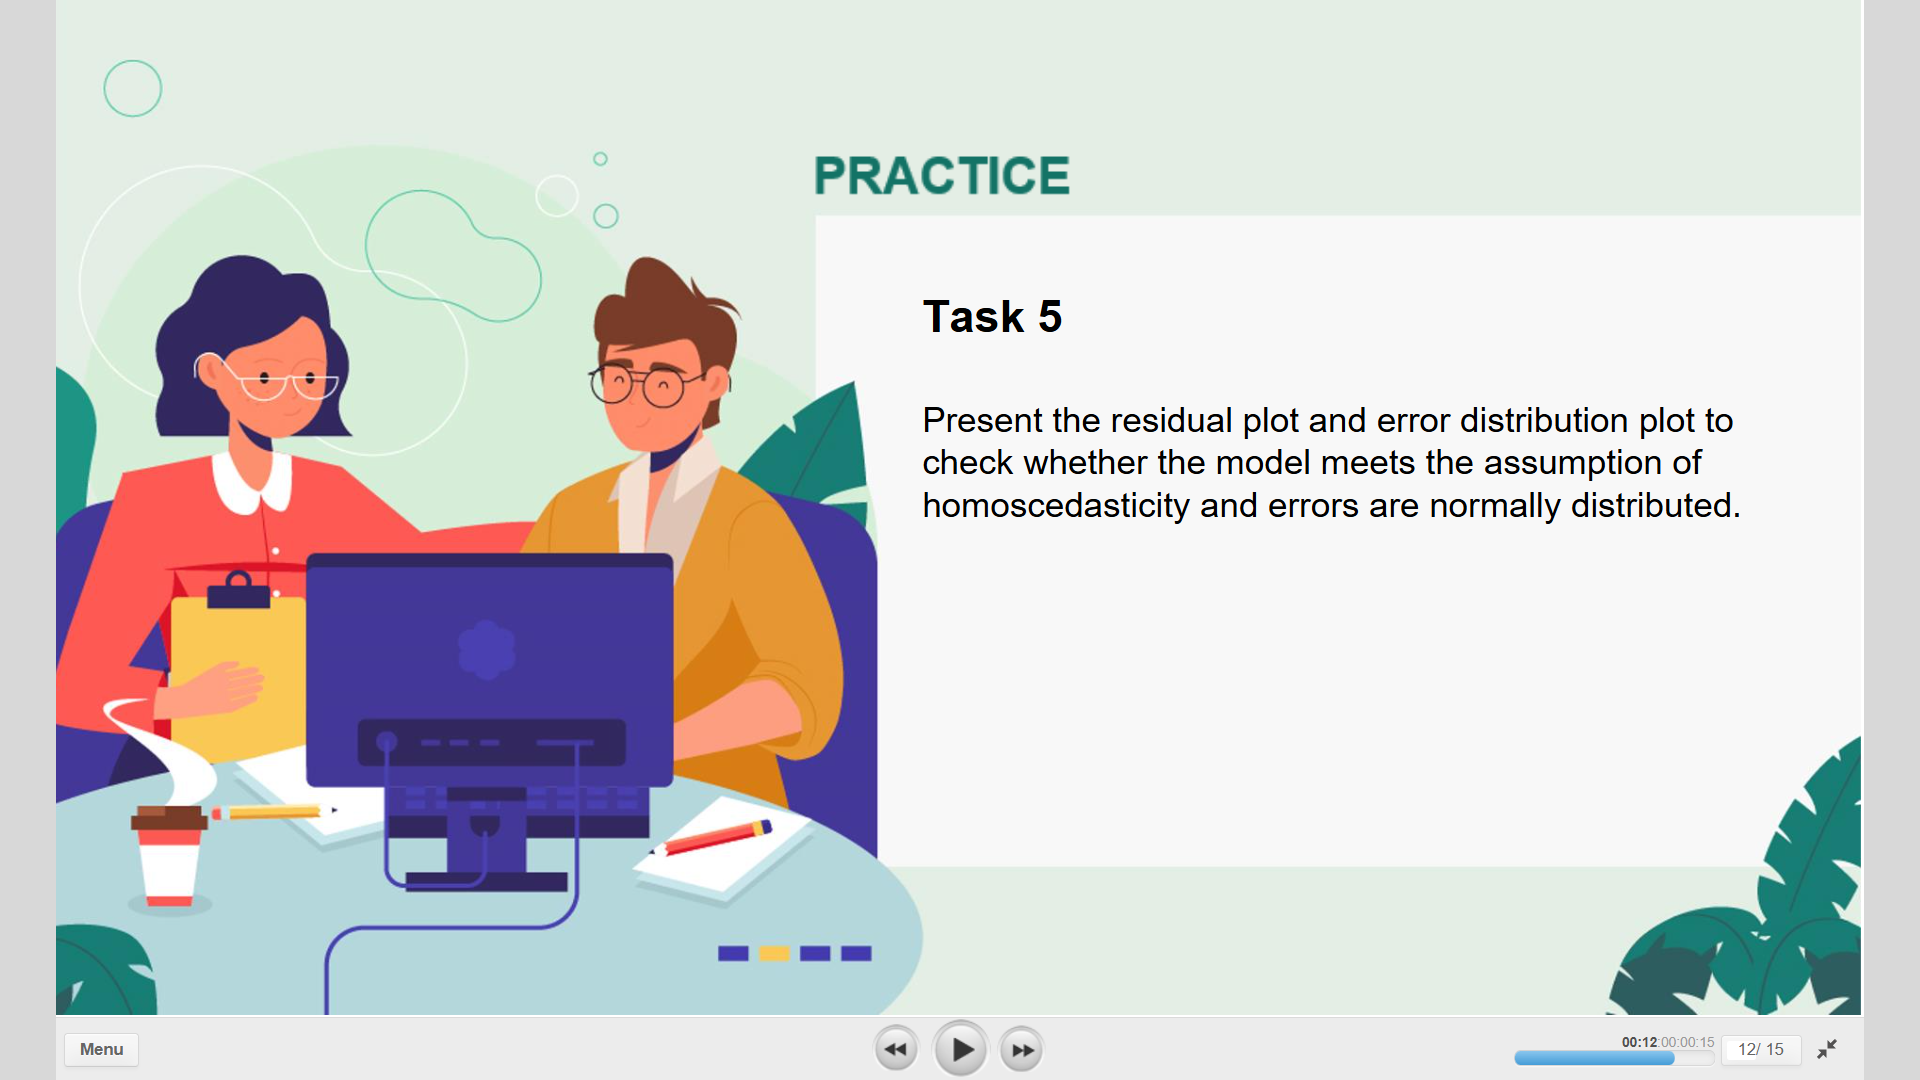

In [122]:
def calculate_residuals(model,features,label):
    predictions=model.predict(features)
    df_results=pd.DataFrame({'Actual':label,'Predicted':predictions})
    df_results['Residuals']=abs(df_results['Actual'])-abs(df_results['Predicted'])
    return df_results
def linear_assumption(model,features,label):
    print('Assumption1:Linear Relationship between the target and the Feature','\n')
    print('checking with a scatter plot of actual vs predicted .','Predictions should follow the diagonal line.')
    df_results=calculate_residuals(model,features,label)
    # ploting actual vs predicted
    sns.lmplot(x='Actual',y='Predicted',data=df_results,fit_reg=False)
    # plotting the diagonal line
    line_cords=np.arange(df_results.min().min(),df_results.max().max())
    plt.plot(line_cords,line_cords,color='darkorange',linestyle='--')
    plt.title('Actual vs Predicted')
    plt.show()
    

Assumption1:Linear Relationship between the target and the Feature 

checking with a scatter plot of actual vs predicted . Predictions should follow the diagonal line.


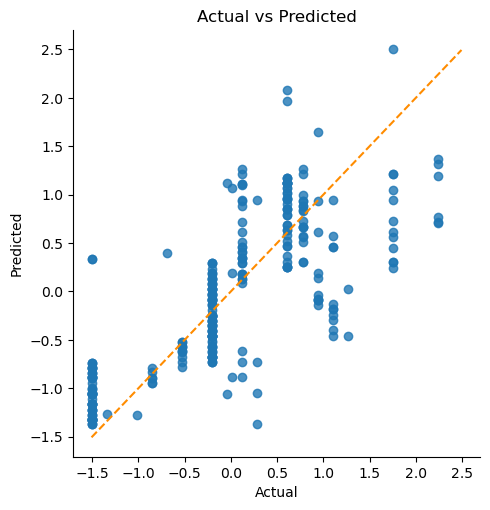

In [124]:
linear_assumption(s_model3,X_test3,y_test3)

# the points show a general trend but for 0 to 1 there is considerable  scatter and deviation so  it is partially satisified.

In [129]:
def homoscedasticity_assumption(model,feature,label):
    print('Assumption:Homoscedansticity of the error terms','\n')
    print('Residuals should have relative constant variance')

    df_results=calculate_residuals(model,feature,label)

    plt.subplots(figsize=(12,6))
    ax=plt.subplot(111)
    plt.scatter(x=df_results.index,y=df_results.Residuals)
    plt.plot(np.repeat(0,df_results.index.max()),color='darkorange',linestyle='--')
    plt.title('Residuaal Plot')
    plt.xlabel('index')
    plt.ylabel('Residuals')
    plt.show()

Assumption:Homoscedansticity of the error terms 

Residuals should have relative constant variance


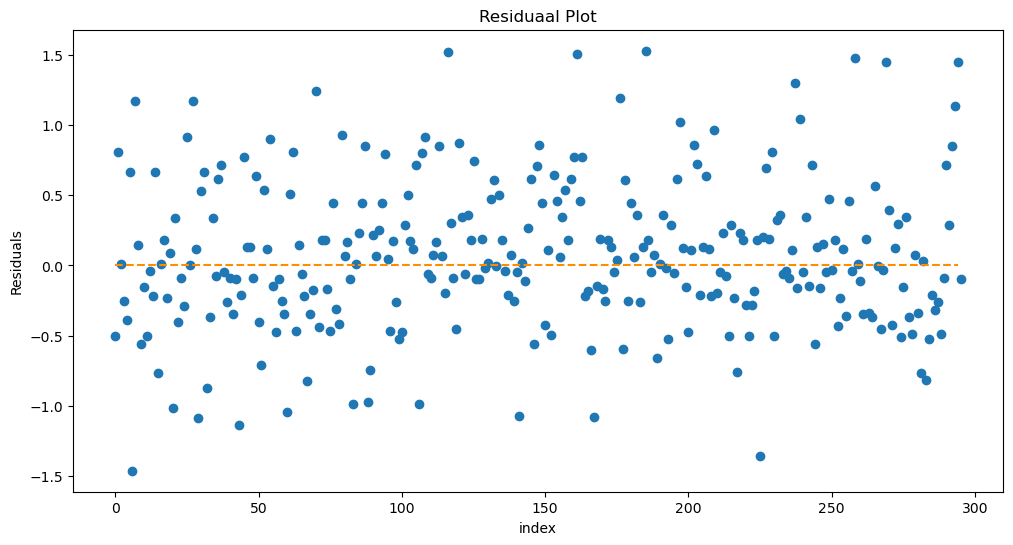

In [131]:
homoscedasticity_assumption(s_model3,X_test3,y_test3)

# the residuals are evevnly spread with not a certain pattern.Variance appears relatively constant and the linaer line(orange) is close to the center.

# 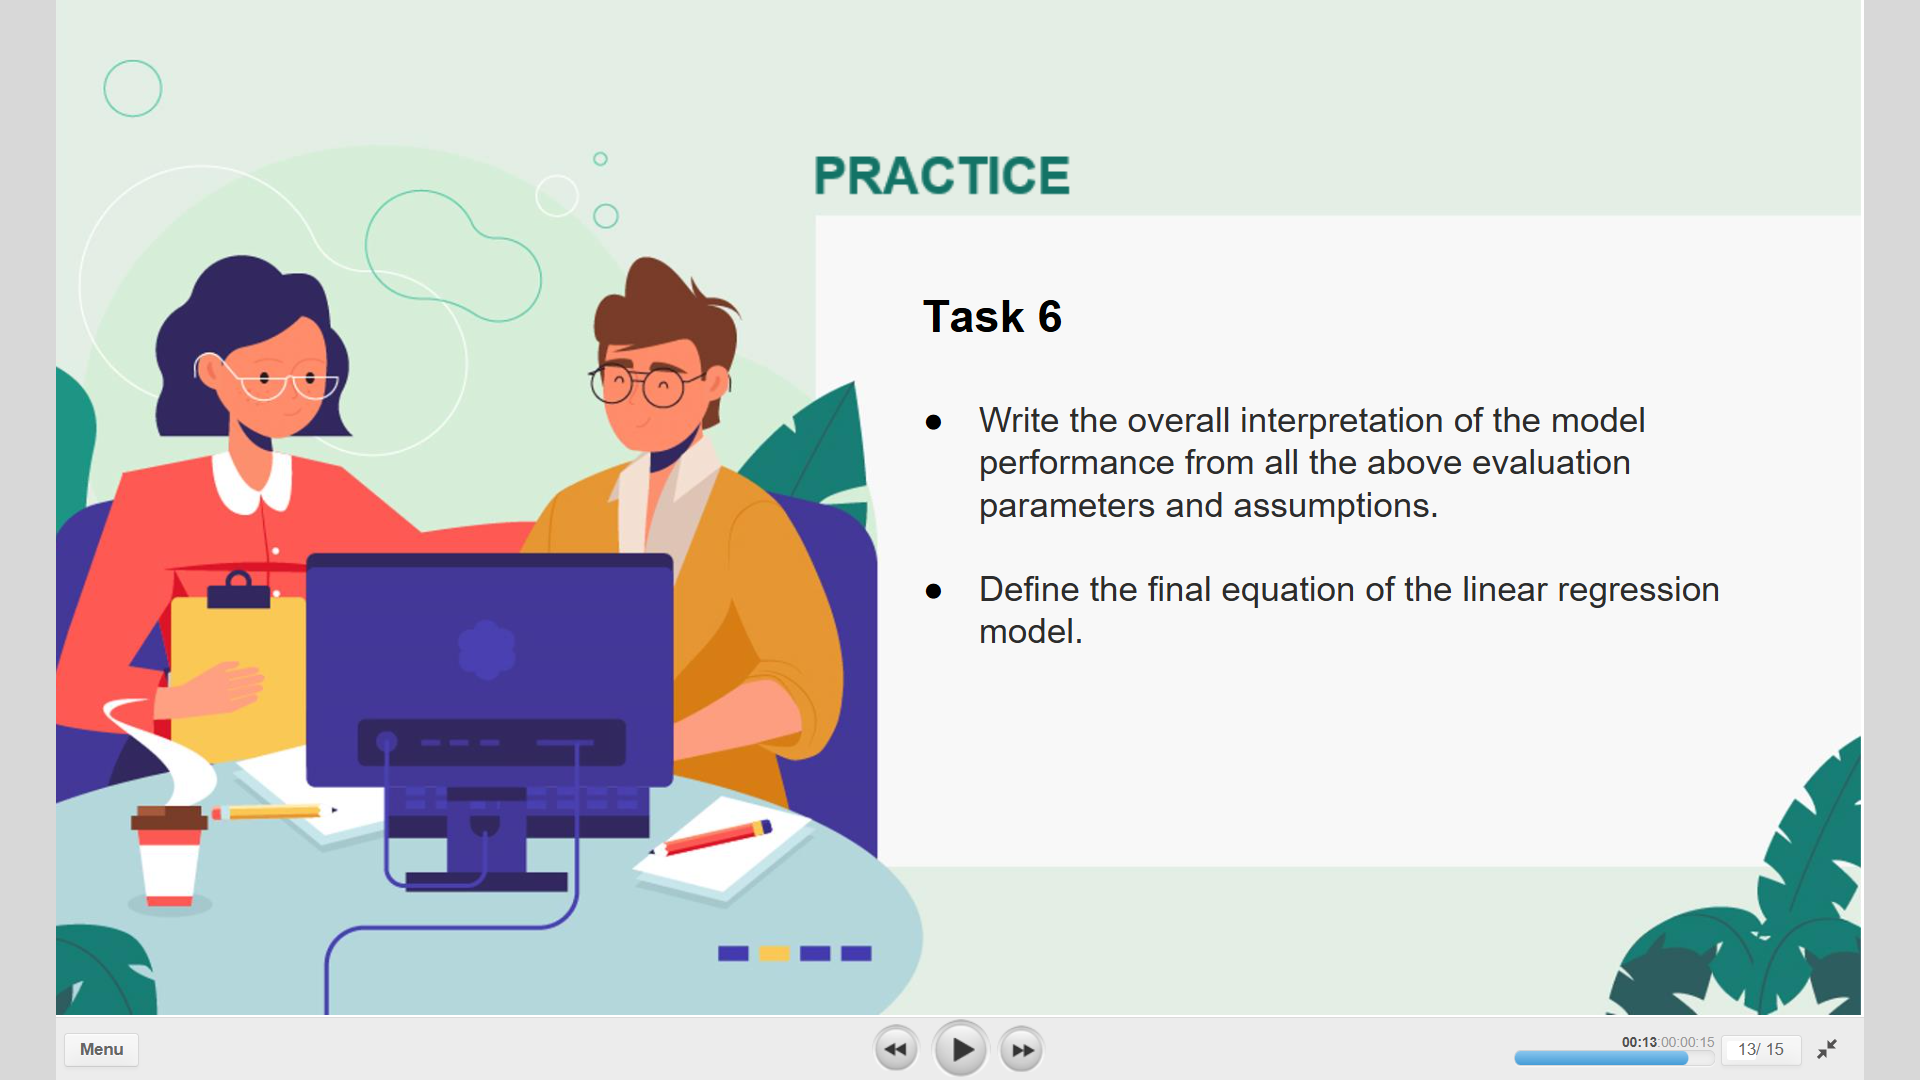

# .....................1st model(Age).....................
# score of trained model 0.5156142790580635
# intercept 0.007892153520428154
# Slope [0.7361793]
# mean squared error 0.43
# mean absolute error 0.48
# root mean squared error 0.66
# r2(square) score : 0.51
# .....................2nd model(Age,AnyTransplants).....................
# score of trained model 0.6157475204473157
# intercept -0.0009589640335532605
# Slope [0.74119706 0.30750364]
# mean squared error 0.37
# mean absolute error 0.46
# root mean squared error 0.61
# r2(square) score : 0.58
# .....................3rd model(Age,AnyTransplants,NumberOfMajorSurgeries.....................
# score of trained model 0.616520153724819
# intercept -0.0012442419828776544
# Slope [ 0.75314579  0.30682397 -0.03107053]
# mean squared error 0.37
# mean absolute error 0.46
# root mean squared error 0.61
# r2(square) score : 0.58

# 1st model has less r square compared to 2nd and 3 rd model.All the error mean squaree,mean absolute ,rmse are also lesser for 2nd and 3rd model we chose 3rd model for better representative

# the model is generally decent .

# for the 3rd model the final equation is :
# y=a+bix1+b2x2+b3x3
# y=-0.001+0.753x1+0.306x2-0.031x3